In [76]:
import folium
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display,IFrame

In [77]:
mis_coordenadas = [19.323644794070223, -99.17898375489459]
mapa = folium.Map(location=mis_coordenadas,zoom_start=15)
folium.Marker(mis_coordenadas,popup='Aqui toy').add_to(mapa)
mapa.save('salon.html')

In [78]:
mis_datos = np.genfromtxt('./Folder_datos/YoEnBici2.csv',delimiter=',',dtype=float)
t = mis_datos[1:,0]
lat_long = mis_datos[1:,1:3]
mi_mapa = folium.Map(location=lat_long[0],zoom_start=13)
trayectoria = folium.PolyLine(locations=lat_long,color='#F02D8E',weight=6).add_to(mi_mapa)
folium.Marker(location=lat_long[0],popup="Start",icon=folium.Icon(color='green')).add_to(mi_mapa)
folium.Marker(location=lat_long[-1],popup="End",icon=folium.Icon(color='red')).add_to(mi_mapa)
#mi_mapa.save('Rich_bici.html') # En este caso no se necesita esta linea
display(mi_mapa)

In [79]:
mis_datos = np.genfromtxt('./Folder_datos/YoEnBici2.csv',delimiter=',',dtype=float)
t = mis_datos[1:,0]
lat_long = mis_datos[1:,1:3]
mi_mapa = folium.Map(location=lat_long[0],zoom_start=13)
trayectoria = folium.PolyLine(locations=lat_long,color='#F02D8E',weight=6).add_to(mi_mapa)
folium.Marker(location=lat_long[0],popup="Start",icon=folium.Icon(color='green')).add_to(mi_mapa)
folium.Marker(location=lat_long[-1],popup="End",icon=folium.Icon(color='red')).add_to(mi_mapa)
mi_mapa.save('Rich_bici.html')
IFrame(src='Rich_bici.html',width=350,height=350)

In [80]:
mis_datos = np.genfromtxt('./Folder_datos/YoEnBici2.csv',delimiter=',',dtype=float)
t = mis_datos[1:,0]
lat_long = mis_datos[1:,1:3]
mi_mapa = folium.Map(location=lat_long[0],zoom_start=13)
trayectoria = folium.PolyLine(locations=lat_long[100:-100],color='#F02D8E',weight=6).add_to(mi_mapa)
folium.Marker(location=lat_long[100],popup="Start",icon=folium.Icon(color='green')).add_to(mi_mapa)
folium.Marker(location=lat_long[-100],popup="End",icon=folium.Icon(color='red')).add_to(mi_mapa)
mi_mapa.save('Rich_bici.html')
IFrame(src='Rich_bici.html',width=350,height=350)

Tiempo=  22.781000216666666 Distancia=  6.5549733502721885


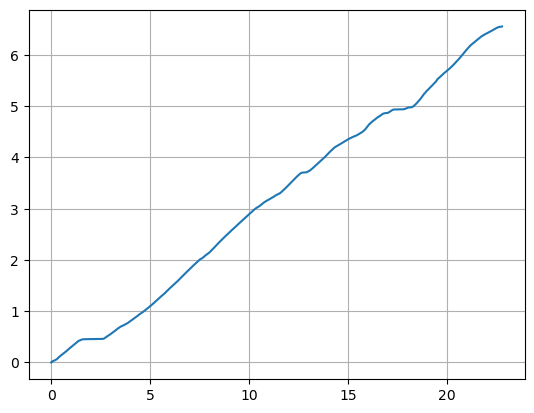

In [88]:
RT = 6371e3
lat = np.deg2rad(lat_long[:,0])
longitud = np.deg2rad(lat_long[:,1])
altura = mis_datos[1:,3]
x = (RT+altura)*np.cos(lat)*np.sin(longitud)
y = (RT+altura)*np.cos(lat)*np.cos(longitud)
z = (RT+altura)*np.sin(lat)
distancia = np.zeros_like(t)
for i in range(len(t)-1):
    distancia[i+1] = distancia[i] + np.sqrt( (x[i+1]-x[i])**2 + (y[i+1]-y[i])**2 + (z[i+1]-z[i])**2 )
plt.plot(t/60,distancia/1000)
print('Tiempo= ',t[-1]/60 , 'Distancia= ',distancia[-1]/1000)
plt.grid()
plt.show()